In [2]:
from utils import profiler, reader, day11_utils
from typing import List, Dict, Tuple, Set
import tqdm

In [3]:
import math
import itertools

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [4]:
datafile = "../data/day11_input.txt"
data = reader.read_from_file(datafile)
data = [x.rstrip() for x in data][0]
data = list(map(int, data.split(" ")))
data

[0, 4, 4979, 24, 4356119, 914, 85734, 698829]

# Part 1

### Overview

We have a set of rules to apply to each element of an array of numbers.


### Approach

We can implement this naively with conditionals.
Note that we need to find the number of digits in a positive integer. 
We could do this by casting to a string and then checking length.
This has linear time complexity in the length of the number.
If the numbers become large, we can instead directly take the logarithm base 10, which would have constant time complexity.

This goes for splitting too. If we use math instead of string conversion, we can avoid this!



In [5]:
def even_digits(x: int) -> bool:
    # Returns true if the number has an even number of digits
    if x < 0:
        x *= -1
    return math.floor(math.log10(x)) % 2 != 0

def split_number(x: int) -> List[int]:
    # Splits the number into two equal parts in constant time
    negative_factor = 1
    if x < 0:
        x *= -1
        negative_factor = -1
    num_digits = math.floor(math.log10(x)) + 1
    if num_digits % 2 == 1:
        raise ValueError("Number must have an even number of digits")
    
    power_of_10 = 10 ** (num_digits // 2)

    return [x // power_of_10 * negative_factor, x % power_of_10]
    
print(split_number(1234), split_number(-1234))

def rules(x: int) -> List[int]:
    if x == 0:
        return [1]
    elif even_digits(x):
        return split_number(x)
    else:
        return [x*2024]


example = [0, 1, 10, 99, 999]

for x in example:
    print(x, rules(x))

[12, 34] [-12, 34]
0 [1]
1 [2024]
10 [1, 0]
99 [9, 9]
999 [2021976]


In [19]:

@profiler.profile
def part1(data: List[int], n_blinks = 25) -> int:
    
    def blink(lst: List[int]) -> List[int]:
        result = []
        for l in lst:
            result.extend((rules(l)))
        return result
    
    for _ in tqdm.tqdm(range(n_blinks)):
        data = blink(data)
        
    return len(data)

part1(data)



100%|██████████| 25/25 [00:00<00:00, 122.23it/s]

Calling part1: Memory used 10190848 kB; Execution Time: 0.20797541699903377 s


188902

# Part 2

### Overview 

Now we just need to do the same thing but MORE TIMES. Instead of 25 iterations we need 75.

### Approach

We need to optimize the runtime of the program. Let's first see what's going on.
We note that the growth is exponential, and the program takes a few seconds at the 30th iteration.
There is no way we can continue with a simulation approach. Regardless of using numpy or multiprocessing to speed it up.
 
It's important to note that we aren't looking for the actual stones at the end, just the total number of them.
We need a workaround.

In [9]:
# First let's see how the result grows with increasing number of blinks
# we modify the function a little bit to show all sizes

@profiler.profile
def growth_test(data: List[int], n_blinks = 25) -> int:
    n_size = [len(data)]
    def blink(lst: List[int]) -> List[int]:
        results = [rules(x) for x in lst]
        return list(itertools.chain.from_iterable(results))
    
    for _ in tqdm.tqdm(range(n_blinks)):
        data = blink(data)
        n_size.append(len(data))
    
    return n_size
        
    

result = growth_test(data, 30)



100%|██████████| 30/30 [00:01<00:00, 15.07it/s] 

Calling growth_test: Memory used 60276736 kB; Execution Time: 2.0011348339994584 s


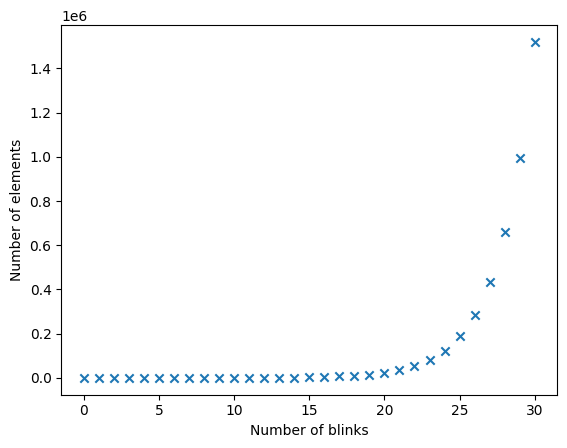

In [16]:
plt.scatter(range(31), result, marker='x')
plt.xlabel("Number of blinks")
plt.ylabel("Number of elements")
plt.show()

It's clear that there is an exponential growth pattern.
This happens because of the rule that SPLITS any number with even length!
This doubles the length of part of the input, effectively repeated multiplication.